PandasAI is still a work-in-progress

In [43]:
from api_key_store import ApiKeyStore
import os

In [44]:
import pandas as pd
from pandasai import Agent, SmartDataframe

In [45]:
s = ApiKeyStore()
# By default, unless you choose a different LLM, it will use BambooLLM.
# You can get your free API key signing up at https://pandabi.ai (you can also configure it in your .env file)
os.environ["PANDASAI_API_KEY"] = s.get_api_key(provider="PANDASAI") 

## Quick Demo

In [31]:
# Sample DataFrame
sales_by_country = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "sales": [5000, 3200, 2900, 4100, 2300, 2100, 2500, 2600, 4500, 7000]
})

In [38]:
sales_by_country

,country,sales
0,United States,5000
1,United Kingdom,3200
2,France,2900
3,Germany,4100
4,Italy,2300
5,Spain,2100
6,Canada,2500
7,Australia,2600
8,Japan,4500
9,China,7000


### SmartDataframe

In [36]:
sdf = SmartDataframe(sales_by_country)

In [37]:
response = sdf.chat('Which are the top 5 countries by sales?')
# print(response)

          country  sales
9           China   7000
0   United States   5000
8           Japan   4500
3         Germany   4100
1  United Kingdom   3200


In [39]:
response

,country,sales
9,China,7000
0,United States,5000
8,Japan,4500
3,Germany,4100
1,United Kingdom,3200


### Agent

In [32]:
agent = Agent(sales_by_country)
agent.chat('Which are the top 5 countries by sales?')

,country,sales
9,China,7000
0,United States,5000
8,Japan,4500
3,Germany,4100
1,United Kingdom,3200


In [8]:
agent.chat(
    "Sort the country by sales in descending order"
)

,country,sales
9,China,7000
0,United States,5000
8,Japan,4500
3,Germany,4100
1,United Kingdom,3200
2,France,2900
7,Australia,2600
6,Canada,2500
4,Italy,2300
5,Spain,2100


In [8]:
df1 = agent.chat('Please sort the dataframe by sales in descending order')

In [10]:
df1[:3]

,country,sales
9,China,7000
0,United States,5000
8,Japan,4500


In [11]:
agent.chat(
    "add the sales number for the top 3 countries by sales?"
)

16500

In [12]:
7000 + 5000 + 4500

16500

above answer is wrong

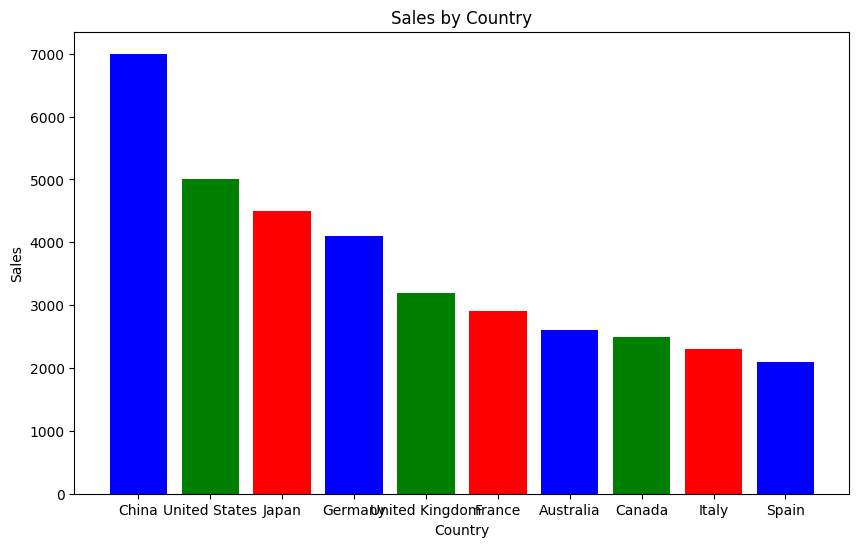

Traceback (most recent call last):
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 133, in execute
    {"content_type": "response", "value": ResponseSerializer.serialize(result)},
                                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/home/gongai/projects/wgong/py4kids/lesson-18-ai/pandasai/exports/charts/temp_chart.png'\n"

In [13]:
agent.chat("""
First, Sort the country by sales in descending order;
Then, Plot the histogram of countries showing for each the gdp, using different colors for each bar
"""
)

## [Yahoo-Finance connector](https://docs.pandas-ai.com/connectors#yahoo-finance-connector)

In [1]:
from pandasai import SmartDataframe
from pandasai.connectors.yahoo_finance import YahooFinanceConnector

yahoo_connector = YahooFinanceConnector("MSFT")

In [6]:
df = SmartDataframe(yahoo_connector)
df.chat("What is the closing price for yesterday?")

414.6700134277344

In [10]:
df.chat("What are the latest 5 rows?")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-23 00:00:00-04:00,432.970001,433.600006,425.420013,427.000000,17211700,0.0,0.0
2024-05-24 00:00:00-04:00,427.190002,431.059998,424.410004,430.160004,11845800,0.0,0.0
2024-05-28 00:00:00-04:00,429.630005,430.820007,426.600006,430.320007,15718000,0.0,0.0
2024-05-29 00:00:00-04:00,425.690002,430.940002,425.690002,429.170013,15517100,0.0,0.0
2024-05-30 00:00:00-04:00,424.041992,424.190002,414.239990,414.670013,28341303,0.0,0.0


## [SmartDataLake](https://docs.pandas-ai.com/examples#working-with-multiple-dataframes-using-the-smartdatalake)

In [46]:
from pandasai import SmartDatalake
import pandas as pd

employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'Marketing', 'Finance']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

In [47]:
lake = SmartDatalake([employees_df, salaries_df])
response = lake.chat("Who gets paid the most?")

Traceback (most recent call last):
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_generator.py", line 33, in execute
    code = pipeline_context.config.llm.generate_code(input, pipeline_context)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pand

In [48]:
response

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

## Agent

- https://docs.pandas-ai.com/examples#working-with-agent

In [49]:
agent = Agent([employees_df, salaries_df], memory_size=10)

In [50]:
query = "Who gets paid the most?"

In [51]:
# Chat with the agent
response = agent.chat(query)
response

'The employee who gets paid the most is Olivia from the Marketing department with a salary of $7000.'

In [52]:
response = agent.explain()
response

'Unfortunately, I was not able to explain, because of the following error:\n\nImplementation required\n'

In [53]:
# Get Clarification Questions
questions = agent.clarification_questions(query)

for question in questions:
    print(question)

NotImplementedError: Implementation required

## Use Ollama

- https://docs.pandas-ai.com/llms#ollama

In [11]:
from pandasai import SmartDataframe
from pandasai.llm.local_llm import LocalLLM

In [ ]:
ollama_llm = LocalLLM(api_base="http://localhost:11434/v1", model="codellama")

In [33]:
df_ollama = SmartDataframe(sales_by_country, config={"llm": ollama_llm})

In [34]:
df_ollama.chat("What are the top 5 countries by sales?")

Traceback (most recent call last):
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, code_context)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 175, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/li

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo code found in the response\n'

In [ ]:
file_data = "data/faculty-Cornell-CS.csv"

In [15]:
df_0 = pd.read_csv(file_data)

In [16]:
df_0

,name,job_title,phd_univ,phd_year,research_area,research_concentration,research_focus,url,img_url,phone,email,cell_phone,office_address,department,school
0,Mohamed Abdelfattah,Assistant Professor,Univ Toronto,2016.0,"Artificial Intelligence, Machine Learning",Artificial Intelligence,NaN,https://www.mohsaied.com,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"Electrical and Computer Engineering, Cornell T...",NaN
1,Jayadev Acharya,Assistant Professor,Univ California San Diego,2014.0,"Artificial Intelligence, Theory of Computing","Artificial Intelligence, Theory of Computation","Information theory, machine learning, and algo...",https://people.ece.cornell.edu/acharya/,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"Electrical and Computer Engineering, CS Field ...",NaN
2,Rachit Agarwal,Associate Professor,Univ Illinois Urbana-Champaign,2013.0,"Systems and Networking, Theory of Computing","Systems, Theory of Computation","Distributed systems, systems for big data anal...",http://www.cs.cornell.edu/~ragarwal/,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"Computer Science, CS Field Member",NaN
3,David Albonesi,Professor,Univ Mass Amherst,1996.0,"Computer Architecture & VLSI, Systems and Netw...",Systems,Adaptive and reconfigurable multi-core and pro...,http://www.csl.cornell.edu/~albonesi/,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"Electrical and Computer Engineering, CS Field ...",NaN
4,Lorenzo Alvisi,Professor,Cornell Univ,1996.0,Systems and Networking,Systems,Theory and practice of dependable distributed ...,http://www.cs.cornell.edu/lorenzo/,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"Computer Science, CS Field Member, Tisch Unive...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Christina Lee Yu,Assistant Professor,MIT,NaN,Theory of Computing,Theory of Computation,"Theory of Computing, Artificial Intelligence (...",https://people.orie.cornell.edu/cleeyu/,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"ORIE, CS Field Member",NaN
118,Haiyuan Yu,Professor,Yale,2005.0,Computational Biology,Scientific Computing and Applications,"Biomedical systems biology, machine learning, ...",https://www.yulab.org,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"Biological Statistics & Computational Biology,...",NaN
119,Ramin Zabih,Professor,Stanford Univ,1994.0,"Human Interaction, Vision","Artificial Intelligence, Theory of Computation","Computer vision and its applications, especial...",http://www.cs.cornell.edu/~rdz,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"Computer Science, Cornell Tech, CS Field Member",NaN
120,Cheng Zhang,Assistant Professor,Georgia Institute Technology,2018.0,Artificial Intelligence,Systems,"Ubiquitous Computing, Wearable Computing, Huma...",http://www.czhang.org/,https://www.cs.cornell.edu/sites/default/files...,NaN,NaN,NaN,NaN,"Information Science, CS Field Member",NaN


In [ ]:
df = SmartDataframe(file_data, config={"llm": ollama_llm})

In [13]:
df.chat("What are the column names")

Traceback (most recent call last):
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, c

"Unfortunately, I was not able to answer your question, because of the following error:\n\n[Errno 2] No such file or directory: '/full/path/to/file1.csv'\n"

In [18]:
df_0.shape

(122, 15)

In [17]:
agent = Agent(df_0)
agent.chat('How many rows?')

122

In [21]:
df_0.columns

Index(['name', 'job_title', 'phd_univ', 'phd_year', 'research_area',
       'research_concentration', 'research_focus', 'url', 'img_url', 'phone',
       'email', 'cell_phone', 'office_address', 'department', 'school'],
      dtype='object')

In [20]:
agent.chat('What are the data columns?')

['name', 'job_title', 'phd_univ', 'phd_year', 'research_area', 'research_concentration', 'research_focus', 'url', 'img_url', 'phone', 'email', 'cell_phone', 'office_address', 'department', 'school']
['name', 'job_title', 'phd_univ', 'phd_year', 'research_area', 'research_concentration', 'research_focus', 'url', 'img_url', 'phone', 'email', 'cell_phone', 'office_address', 'department', 'school']


Traceback (most recent call last):
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, c

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [24]:
agent.chat('How many professors have PhD from Stanford University?')

13

In [26]:
agent.chat("""List those professor's name who received PhD. from Stanford University?""")

Traceback (most recent call last):
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/generate_chat_pipeline.py", line 307, in run
    output = (self.code_generation_pipeline | self.code_execution_pipeline).run(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 137, in run
    raise e
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/pipeline.py", line 101, in run
    step_output = logic.execute(
                  ^^^^^^^^^^^^^^
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 113, in execute
    raise e
  File "/home/gongai/anaconda3/envs/pandasai/lib/python3.11/site-packages/pandasai/pipelines/chat/code_execution.py", line 85, in execute
    result = self.execute_code(code_to_run, c

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'